# Exploring Data on Forest Fires

In this project, [data](https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/) on Forest Fires will be explored and visualized. The dataset we'll be working with in this is associated with a scientific research paper on predicting the occurrence of forest fires in Portugal using modeling techniques. 

We'll begin by importing the libraries needed, and reading in the dataframe.

In [2]:
library(readr)
library(dplyr)
library(ggplot2)
library(purrr)

forestfires <- read_csv("forestfires.csv")

head(forestfires)

Parsed with column specification:
cols(
  X = col_double(),
  Y = col_double(),
  month = col_character(),
  day = col_character(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_double(),
  ISI = col_double(),
  temp = col_double(),
  RH = col_double(),
  wind = col_double(),
  rain = col_double(),
  area = col_double()
)


X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


The columns seen are the follwing:

- X: X-axis spatial coordinate within the Montesinho park map: 1 to 9
- Y: Y-axis spatial coordinate within the Montesinho park map: 2 to 9
- month: Month of the year: 'jan' to 'dec'
- day: Day of the week: 'mon' to 'sun'
- FFMC: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
- DMC: Duff Moisture Code index from the FWI system: 1.1 to 291.3
- DC: Drought Code index from the FWI system: 7.9 to 860.6
- ISI: Initial Spread Index from the FWI system: 0.0 to 56.10
- temp: Temperature in Celsius degrees: 2.2 to 33.30
- RH: Relative humidity in percentage: 15.0 to 100
- wind: Wind speed in km/h: 0.40 to 9.40
- rain: Outside rain in mm/m2 : 0.0 to 6.4
- area: The burned area of the forest (in ha): 0.00 to 1090.84

The acronym FWI stands for "fire weather index", a method used by scientists to quantify risk factors for forest fires. The X and Y variables are coordinates of fire locations.


## Forest Fire patterns by Month

When it comes to understanding how to manage Forest Fires better, it might be helpful to know *when* a forest fire is most likely to occur. 

We'll thus attempt to figure out during which days of the weeks, and during which months, a forest fire is most likely to occur.

In [5]:
forestfires_month <- forestfires %>% group_by(month) %>% summarize(fires=n())

forestfires_day <- forestfires %>% group_by(day) %>% summarize(fires=n())

forestfires_month
forestfires_day

month,fires
apr,9
aug,184
dec,9
feb,20
jan,2
jul,32
jun,17
mar,54
may,2
nov,1


day,fires
fri,85
mon,74
sat,84
sun,95
thu,61
tue,64
wed,54


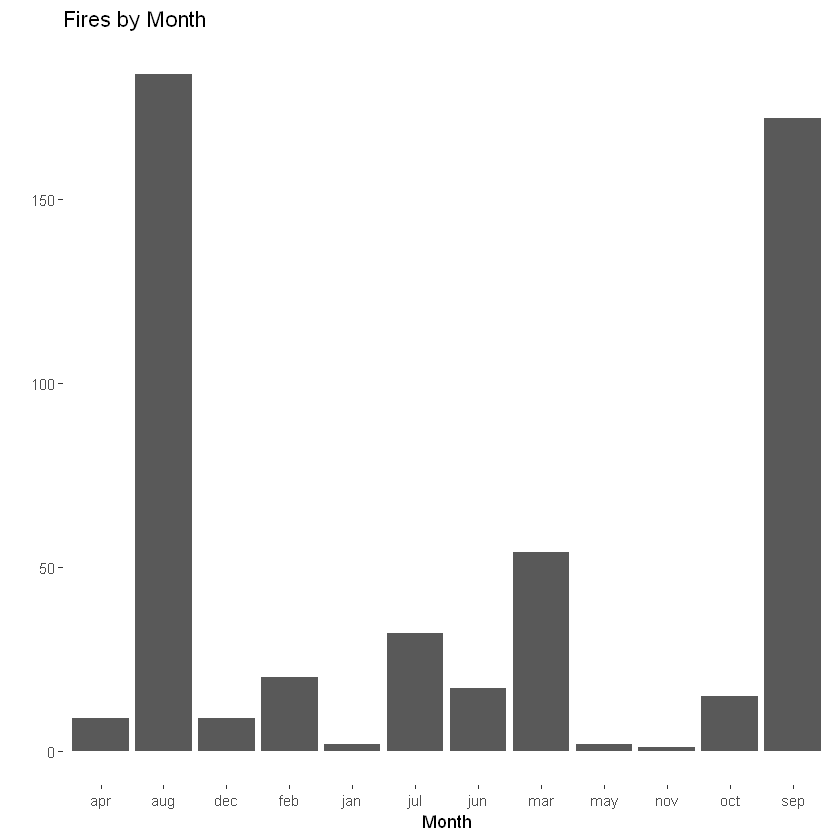

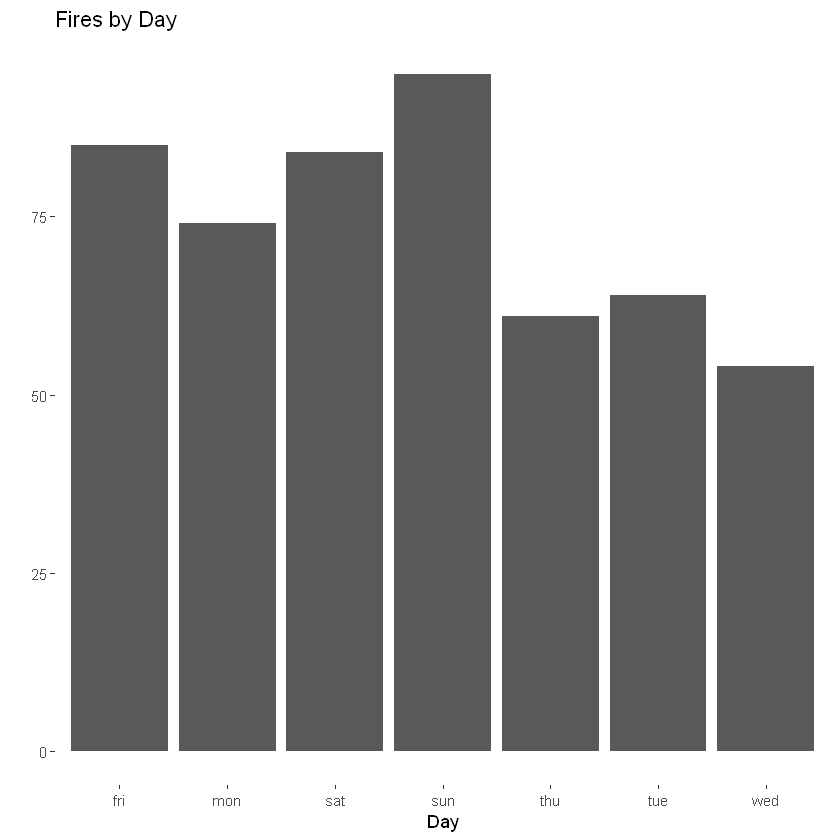

In [11]:
fires_by_month <- ggplot(data=forestfires_month) + aes(x=month,y=fires) + geom_bar(stat="identity") + labs(title = "Fires by Month", x = "Month", y ="") + theme(panel.background = element_rect(fill = "white"))
fires_by_day <- ggplot(data=forestfires_day) + aes(x=day,y=fires) + geom_bar(stat="identity") + labs(title = "Fires by Day", x = "Day", y ="") + theme(panel.background = element_rect(fill = "white"))

fires_by_month
fires_by_day

We'll reorder the 2 bar charts above to sort the Days and Months in chronological order. 

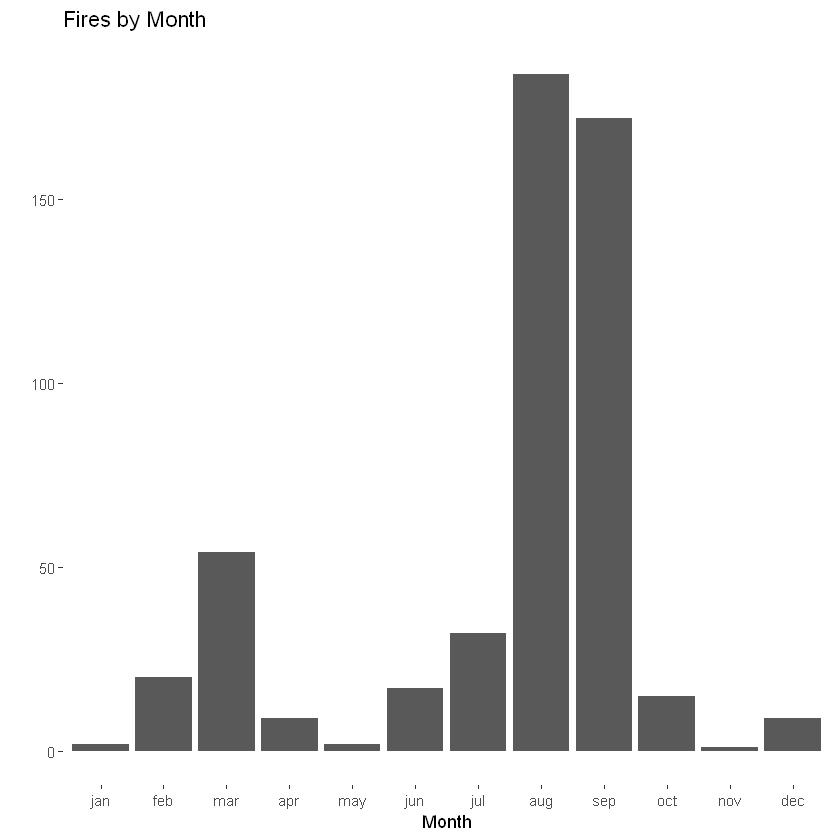

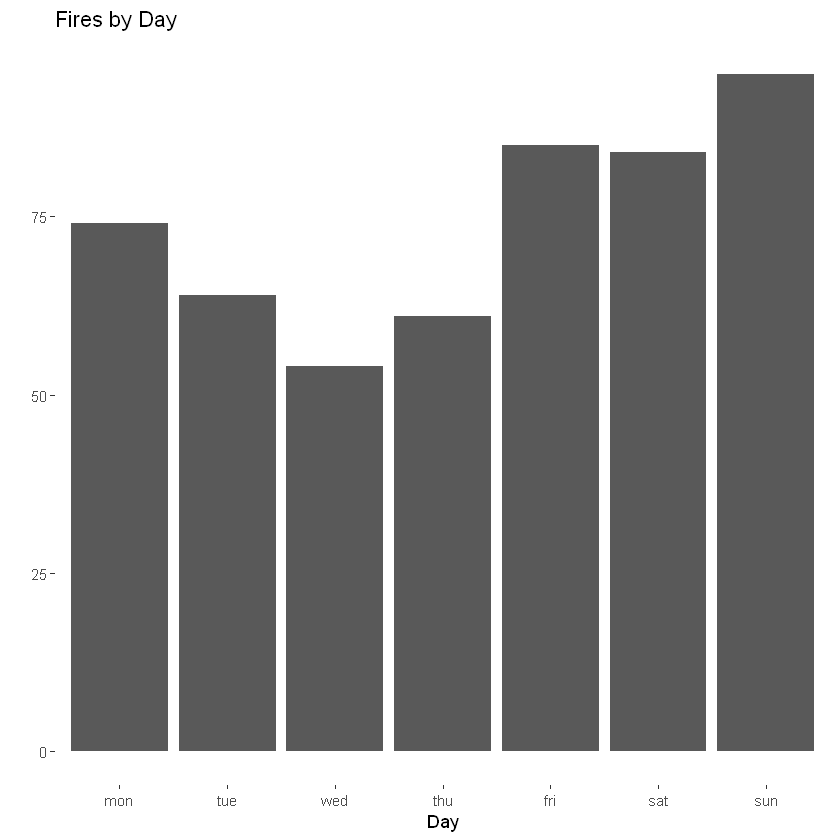

In [14]:
forestfires_month <- forestfires_month %>%
  mutate(month = factor(month, levels = c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")))

forestfires_day <- forestfires_day %>%
  mutate(day = factor(day, levels = c("mon", "tue", "wed", "thu", "fri", "sat", "sun")))

fires_by_month <- ggplot(data=forestfires_month) + aes(x=month,y=fires) + geom_bar(stat="identity") + labs(title = "Fires by Month", x = "Month", y ="") + theme(panel.background = element_rect(fill = "white"))
fires_by_day <- ggplot(data=forestfires_day) + aes(x=day,y=fires) + geom_bar(stat="identity") + labs(title = "Fires by Day", x = "Day", y ="") + theme(panel.background = element_rect(fill = "white"))

fires_by_month
fires_by_day

We see above that we were right to think that reordering the bar charts in chronological orders would be more useful for our analysis. It's clear that August and September, late summer months in the Northern hemisphere, see more forest fires than other months. 

Friday, Saturday, and Sunday seem to have more forest fires than the other days of the week. This could possibly be due to human leisure activity that might take place on Weekends.

## Exploring relationship of other variables with Month and Day

To explore causes of the temporal patterns of forest fires that the bar charts reveal, we can look more closely at how the variables that relate to forest fires vary by month and by day of the week. 

We'll thus create boxplots to visualize the distribution of the following variables by Month and Day of the week:

- FFMC
- DMC
- DC
- ISI
- temp
- RH
- wind
- rain


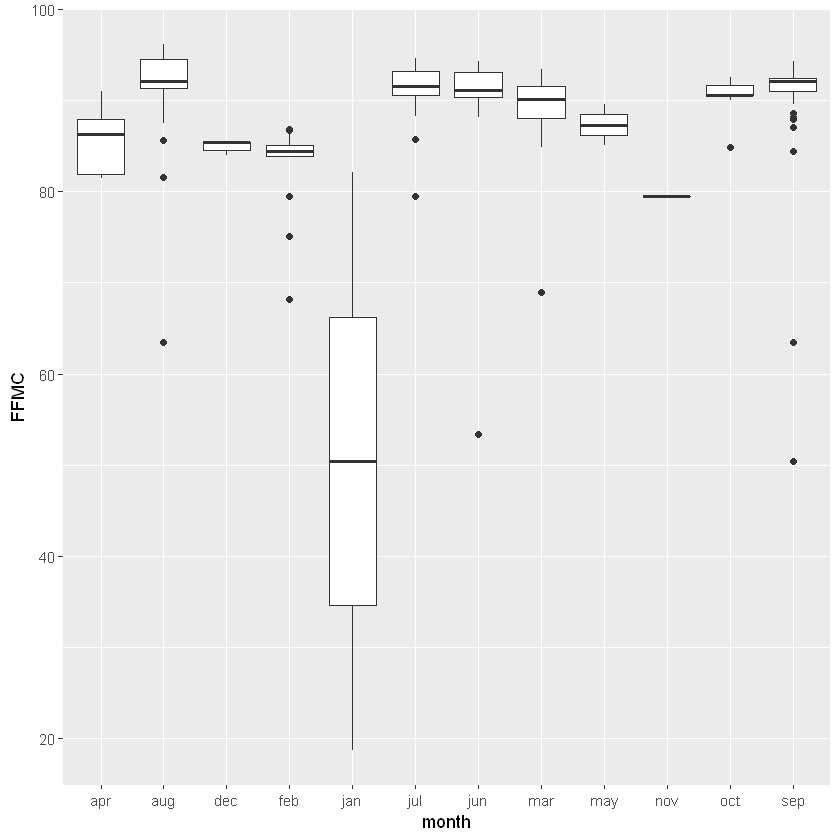

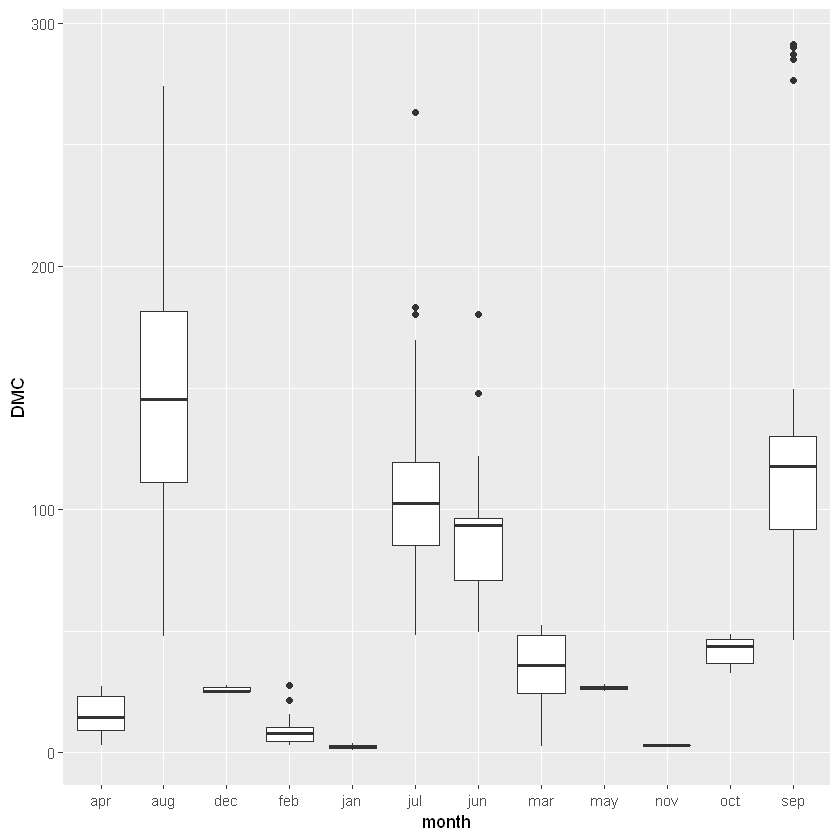

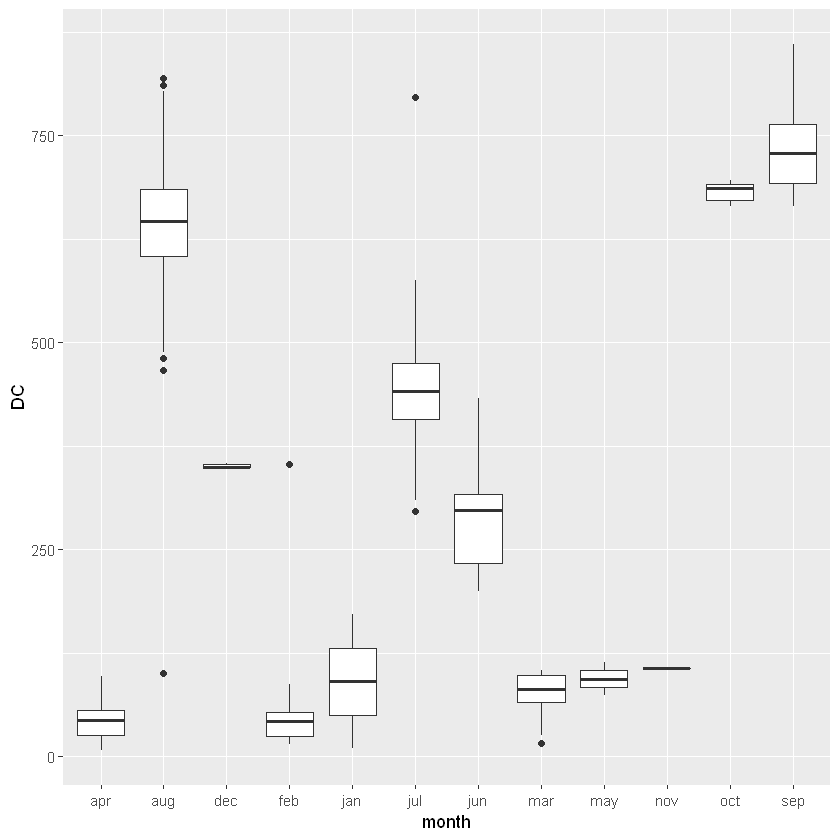

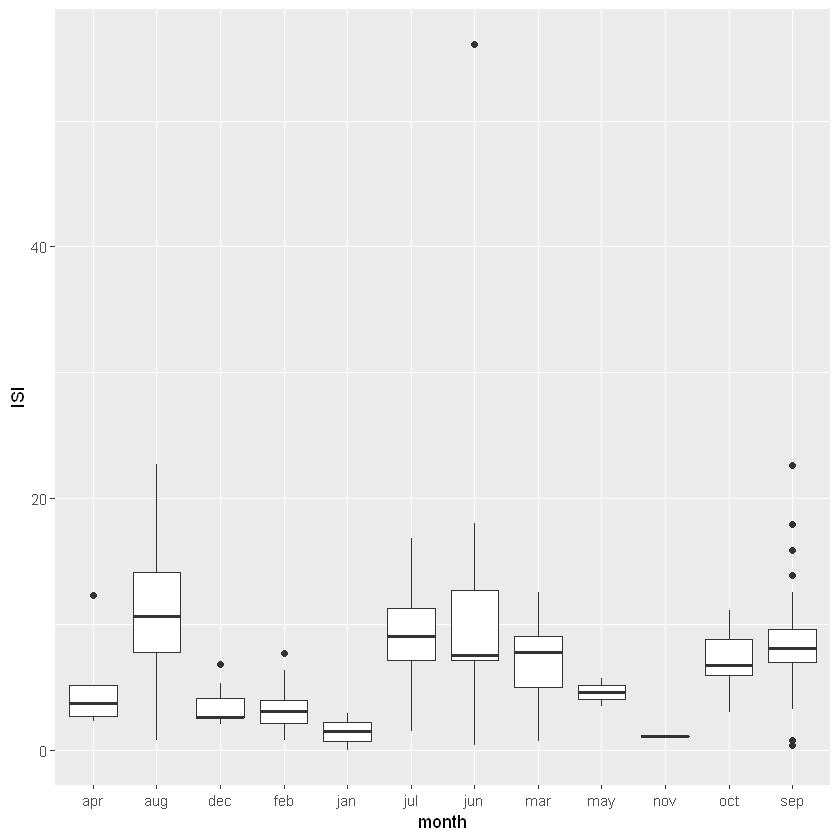

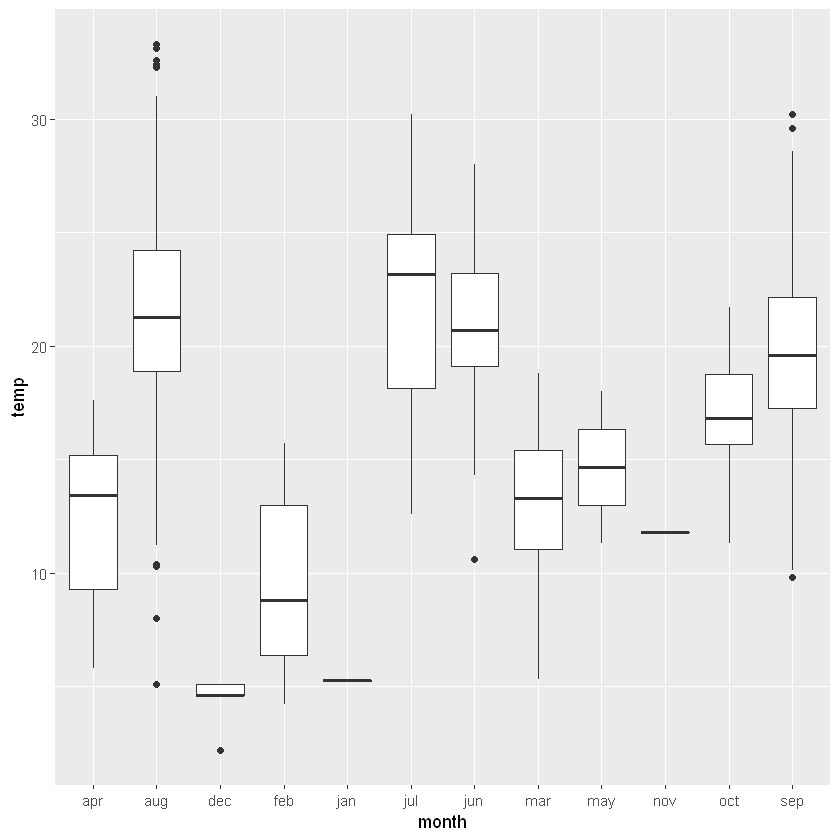

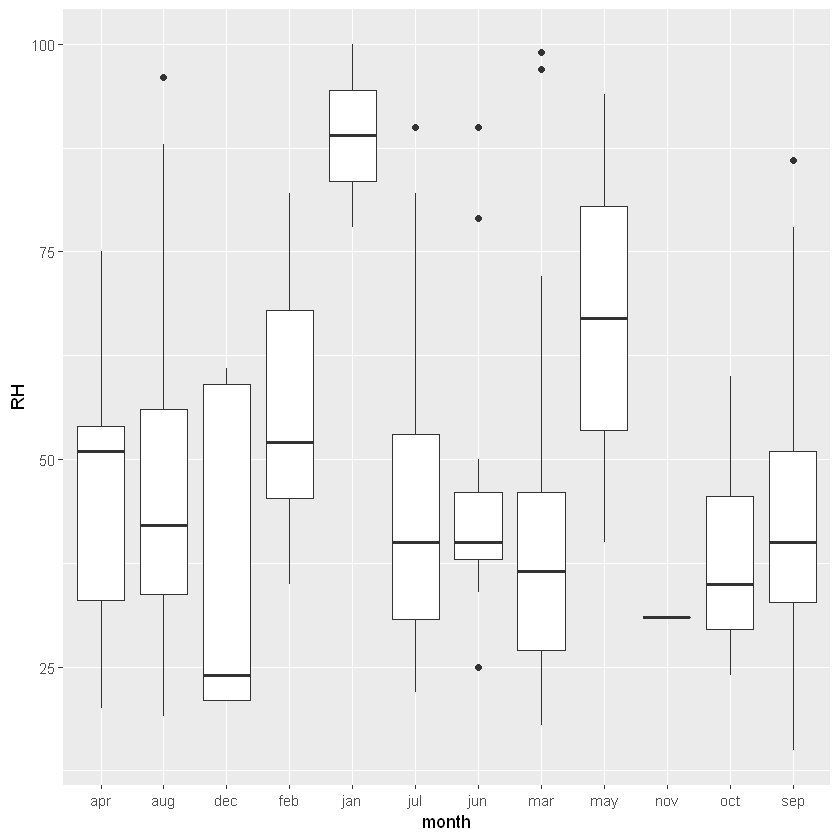

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


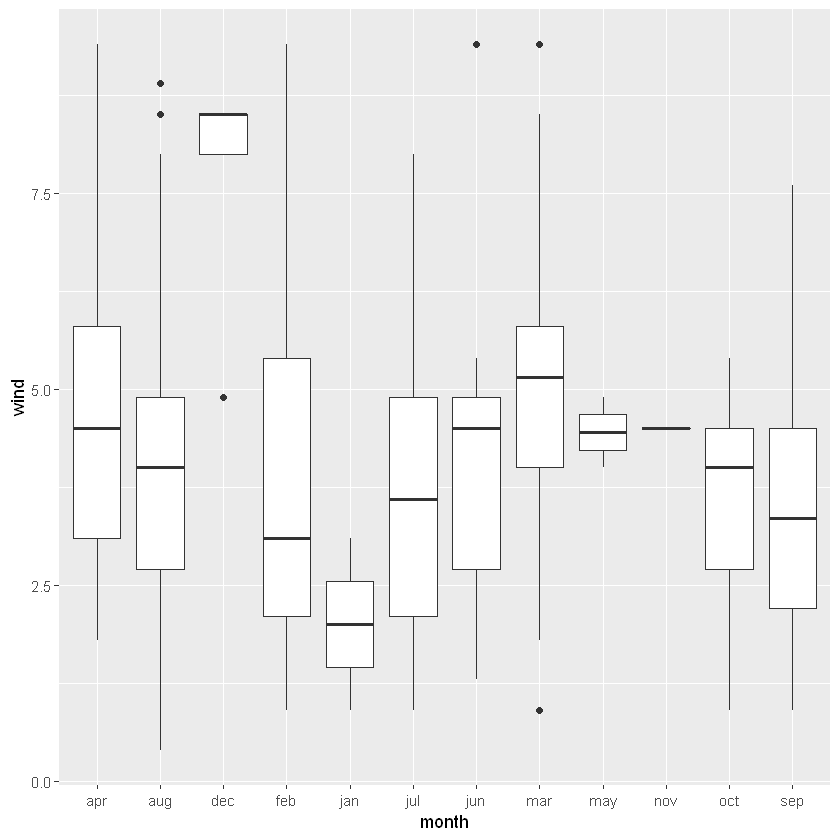

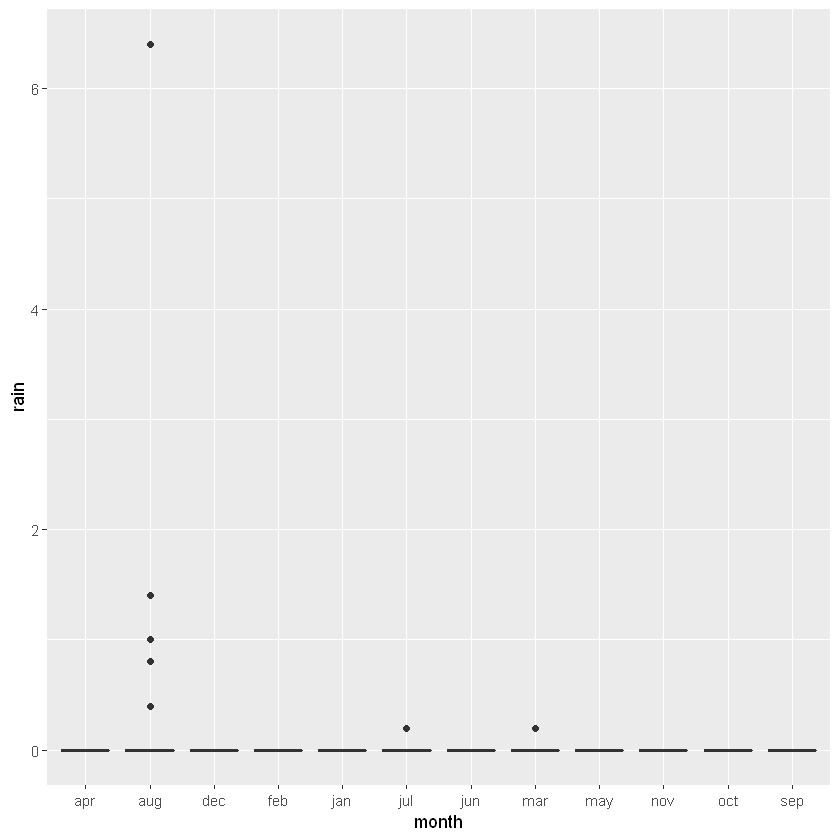

In [15]:
create_boxplot <- function(x,y){
  ggplot(data = forestfires) + aes_string(x = x, y = y) + geom_boxplot()
}

month <- names(forestfires)[3]
y_variables <- names(forestfires)[5:12]

map2(month, y_variables, create_boxplot)

Most of the variables display clear differences by Month.

The `temp` variable shows a pattern of being higher during the summer months. We can also see that the `DC` variable, which stands for "drought code" and is a measure of how dry conditions are, is also high during the late summer months. Both these factors likely play a significant role in explaining the frequency of Forest fires in these months.

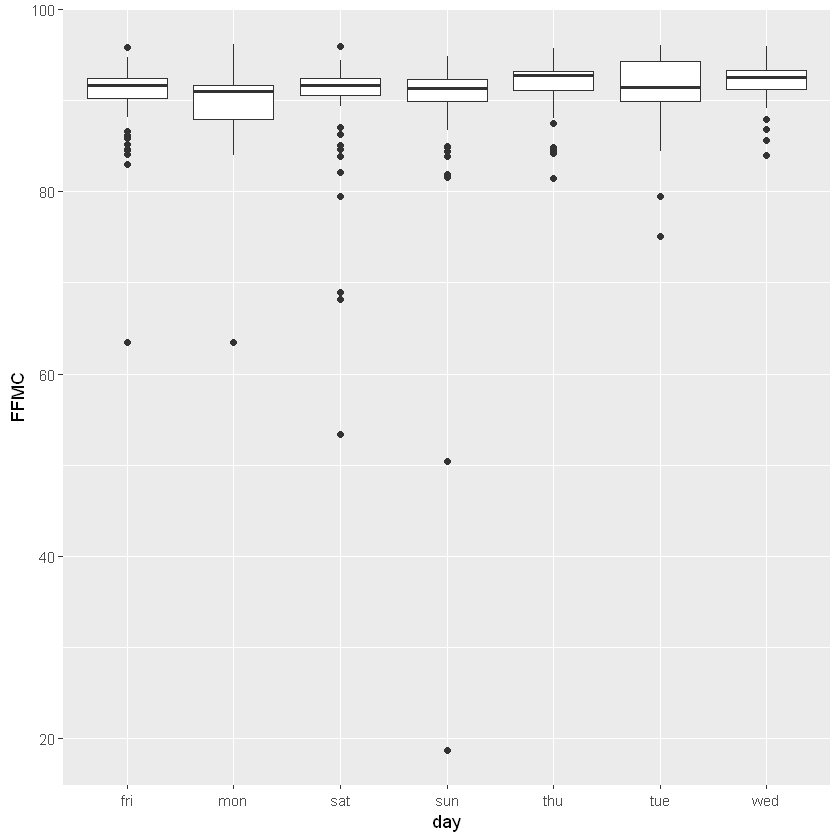

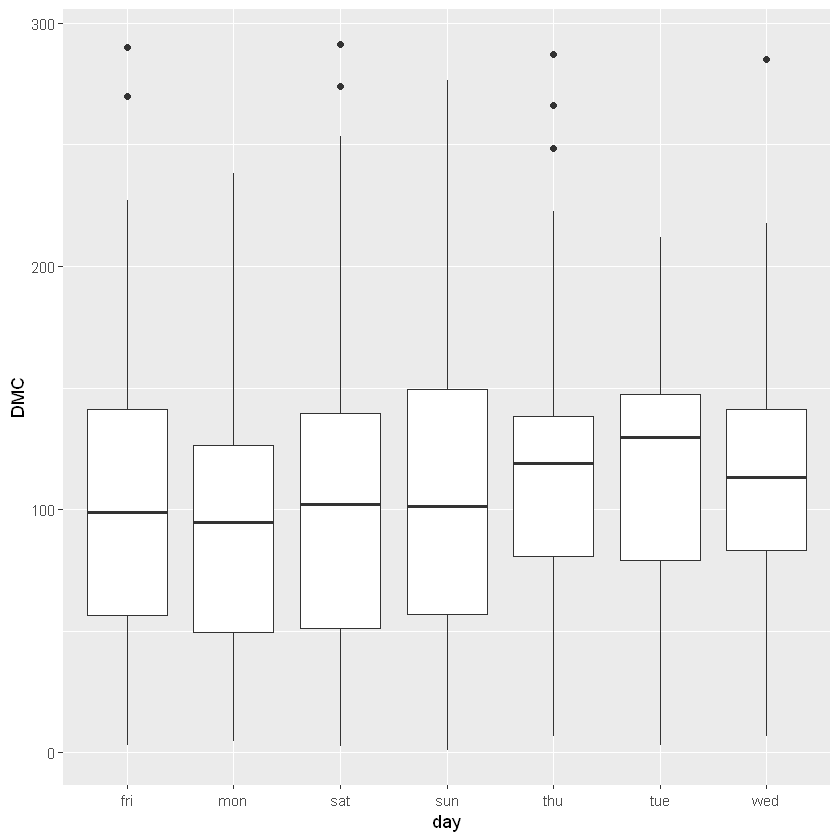

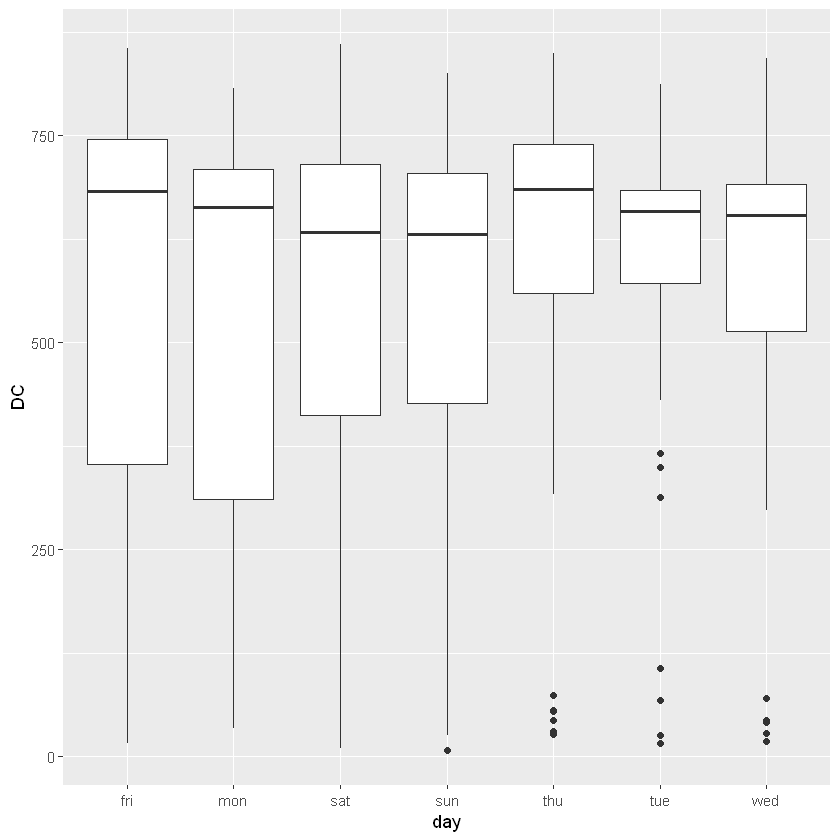

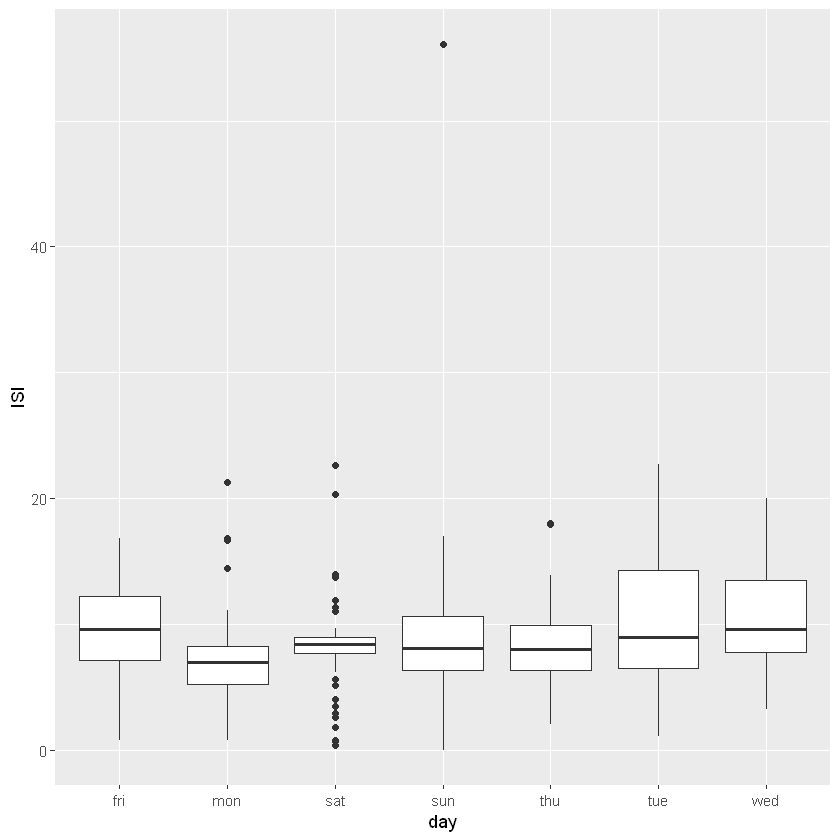

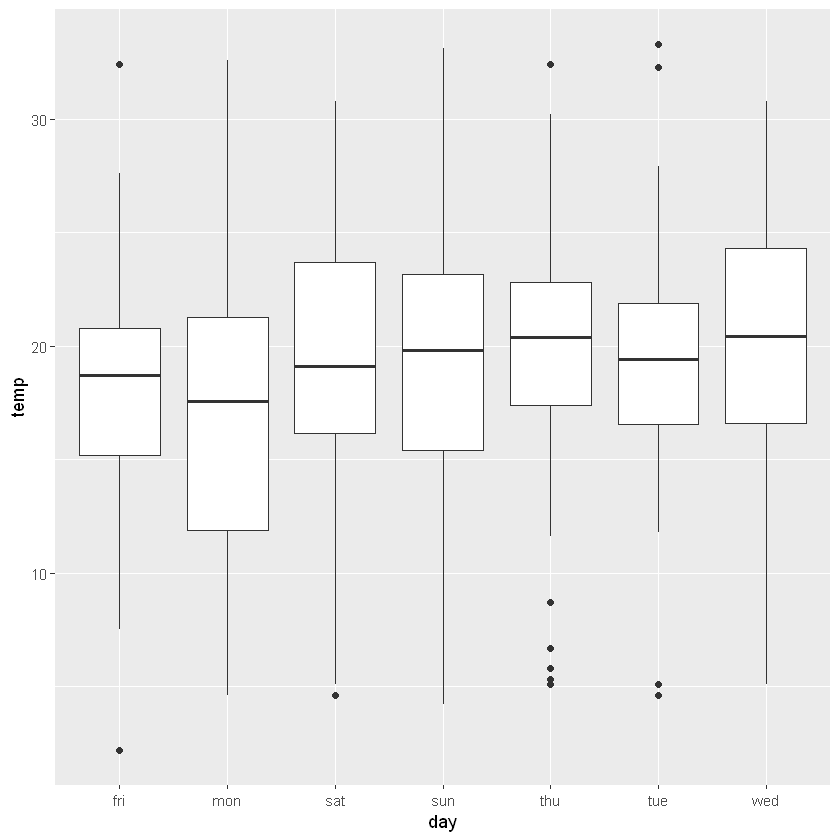

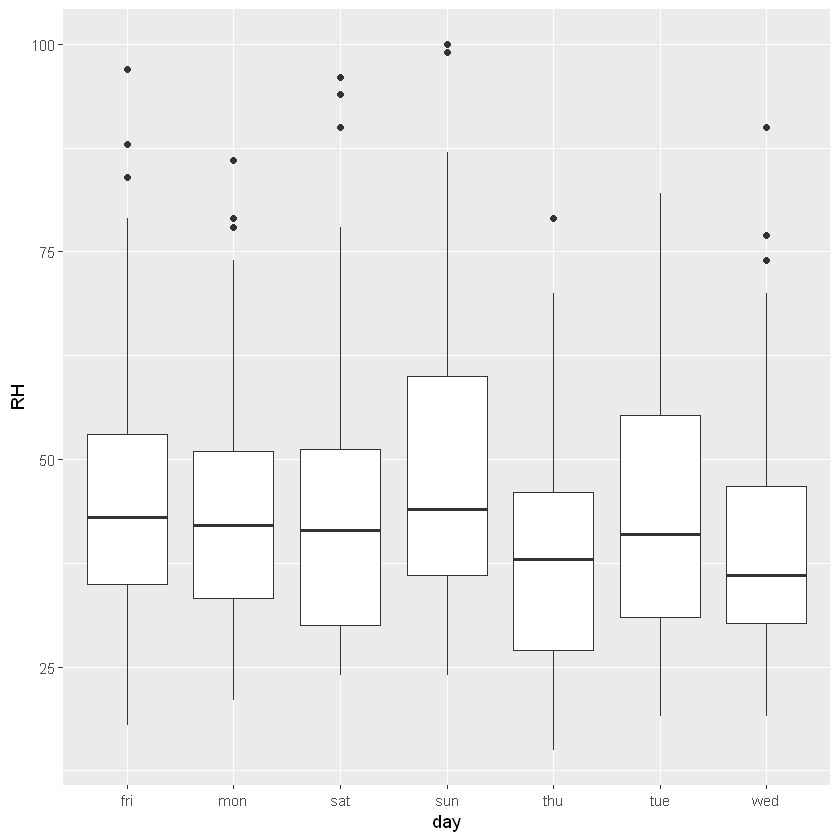

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


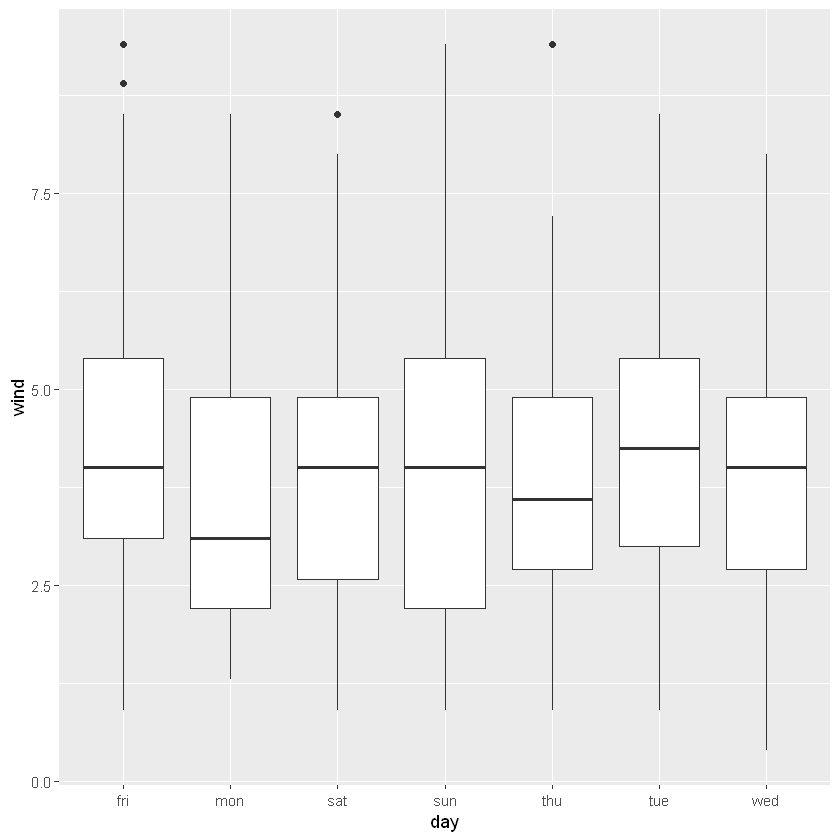

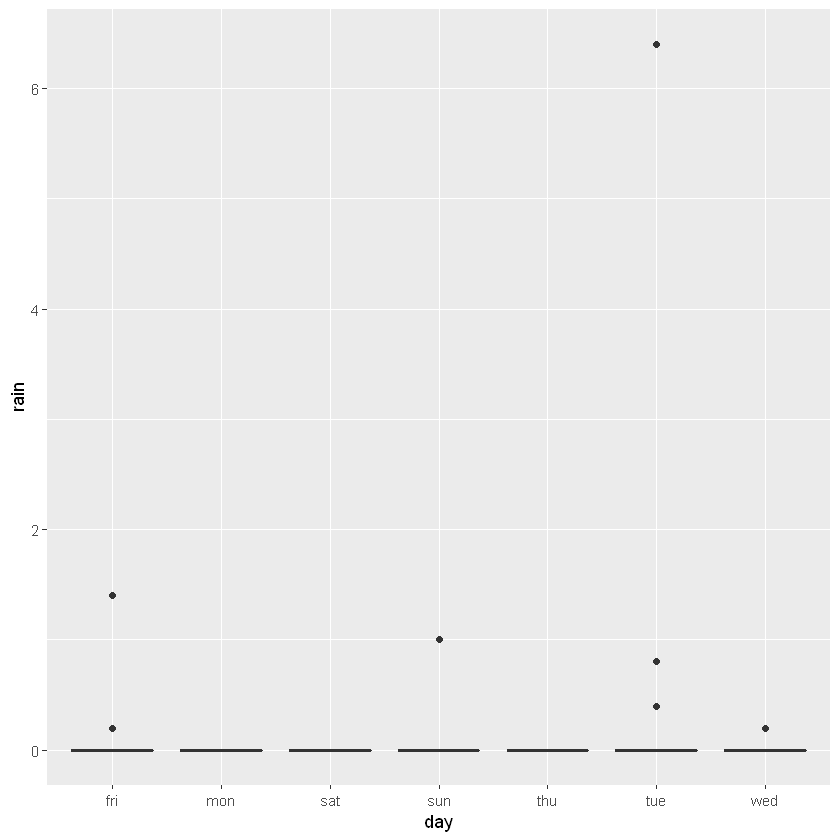

In [17]:
day <- names(forestfires)[4]
y_variables <- names(forestfires)[5:12]

days_plots <- map2(day, y_variables, create_boxplot)

days_plots

The solid black lines in the centers of the boxplots suggest that for the most part, the median of each variable is very consistent by day of the week. The size of the boxes is also very similar - suggesting that the data ranges tend to be about equal too. 

The number of outlier points and the length of the box whiskers representing high and low points vary from day to day. For the most part, there do not seem to be any patterns that suggest that the variables differ by day of the week, apart from the fact that the number of forest fires appears to be higher on weekends.

## Relationship between variables and Forest Fire severity

The `area` variable contains information on the hectares of forest that were burned during a fire. This could be used as an indicator of a fire's severity. 

With this in mind, we'll use Scatter Plots to explore the relationship between the `area` variable, and the following variables:

- FFMC: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
- DMC: Duff Moisture Code index from the FWI system: 1.1 to 291.3
- DC: Drought Code index from the FWI system: 7.9 to 860.6
- ISI: Initial Spread Index from the FWI system: 0.0 to 56.10
- temp: Temperature in Celsius degrees: 2.2 to 33.30
- RH: Relative humidity in percentage: 15.0 to 100
- wind: Wind speed in km/h: 0.40 to 9.40
- rain: Outside rain in mm/m2 : 0.0 to 6.4

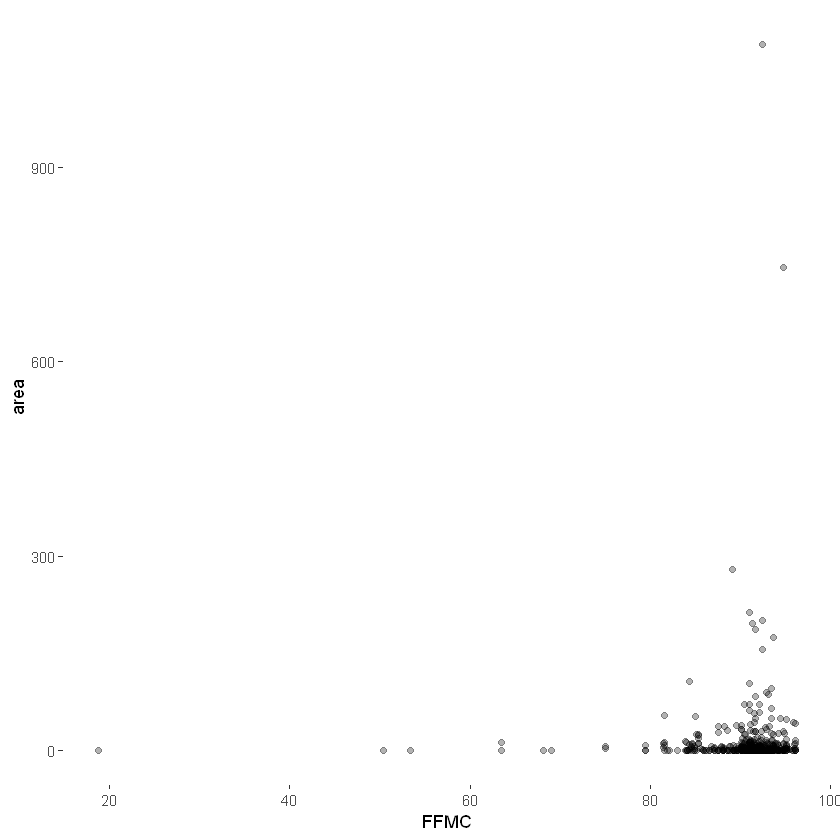

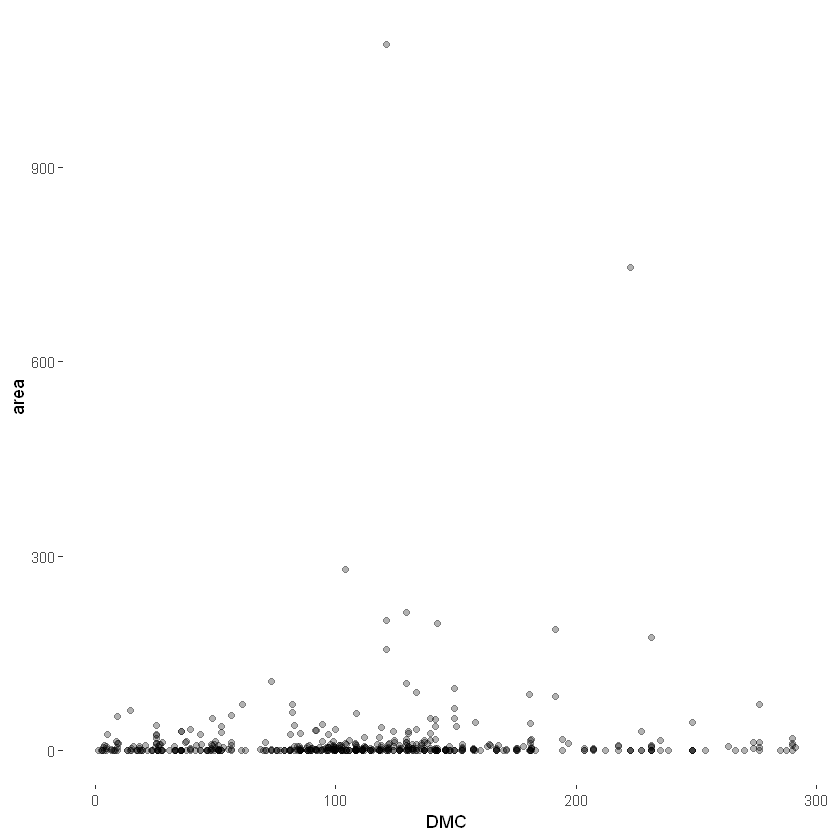

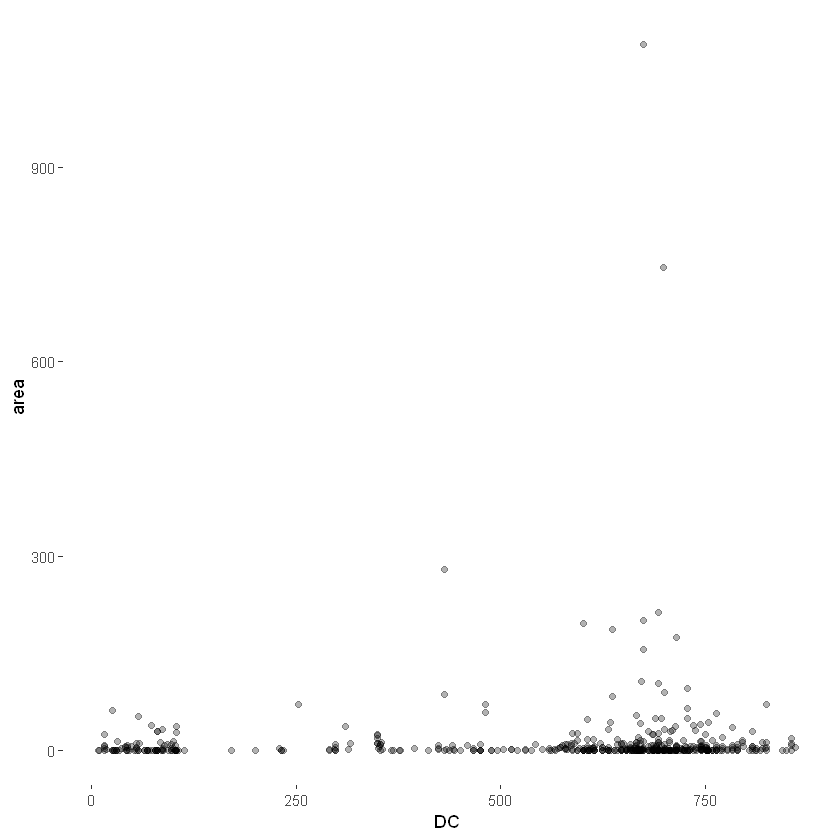

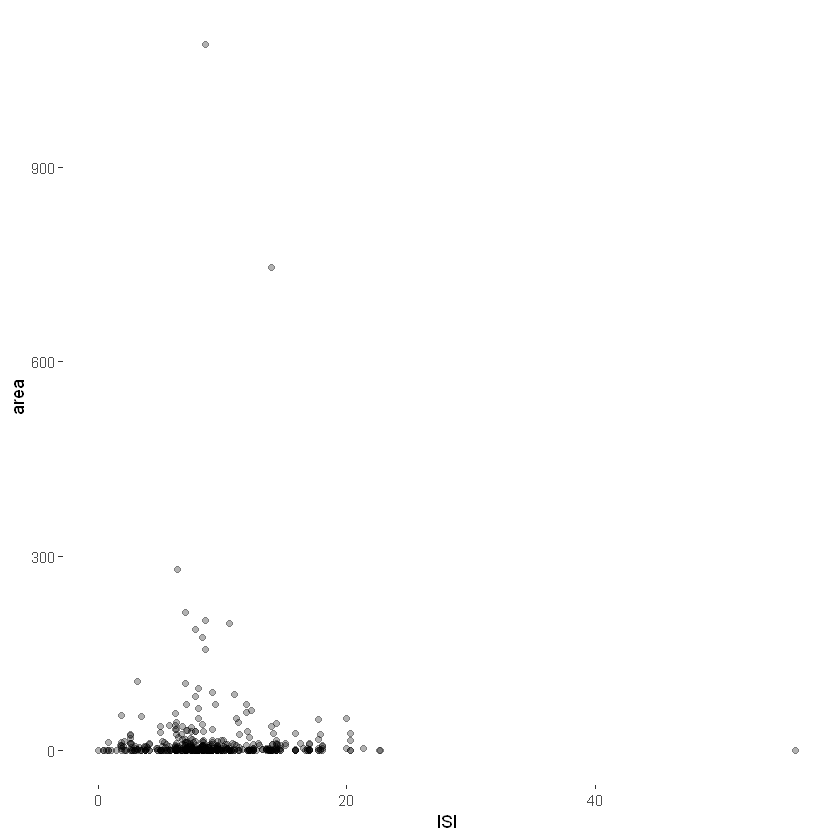

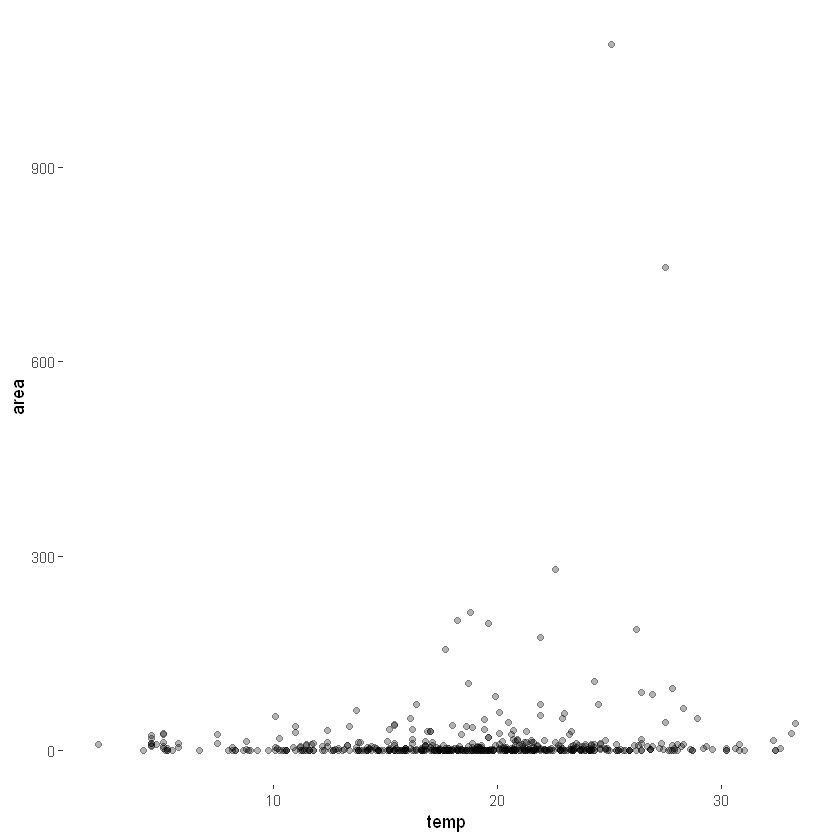

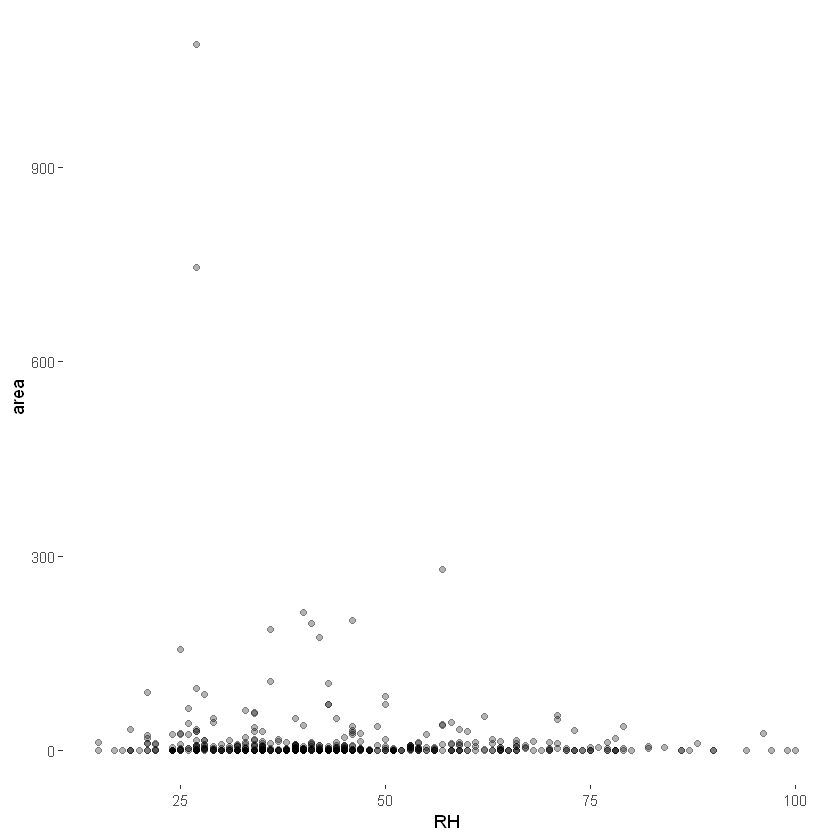

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


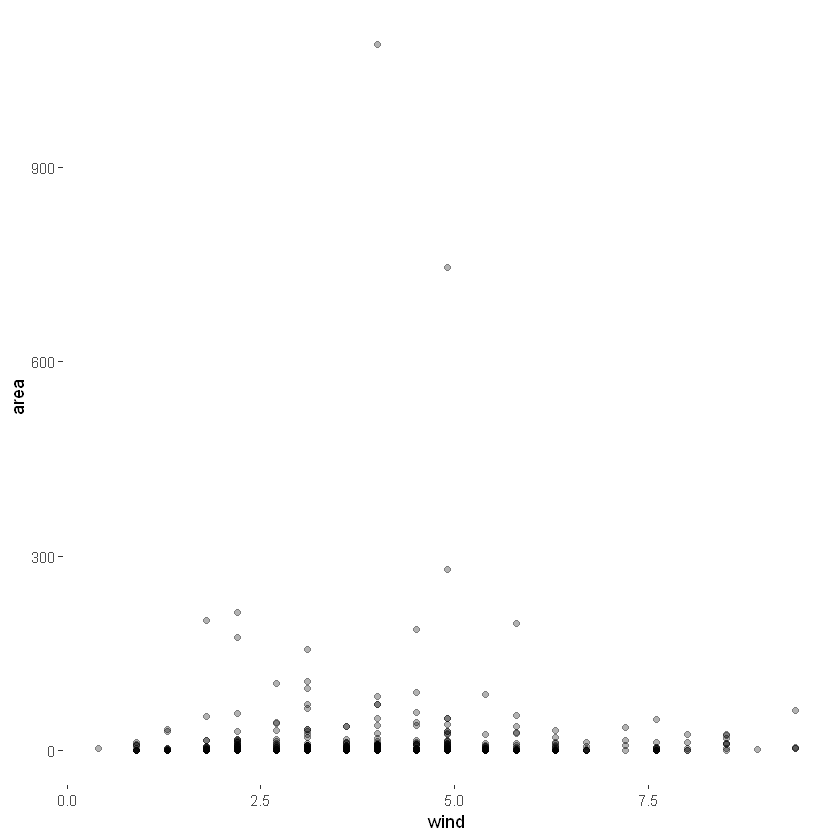

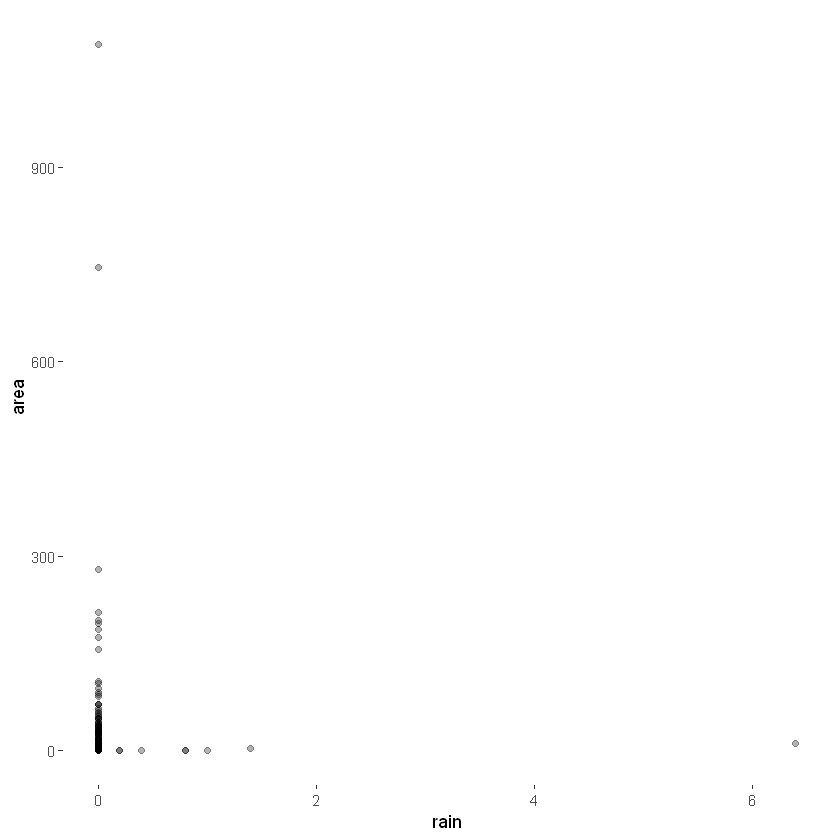

In [19]:
create_scatter <- function(x){
  ggplot(data = forestfires) + aes_string(x = x, y = "area") + geom_point(alpha=0.3) + theme(panel.background = element_rect(fill = "white"))
}

x_scatter_vals = names(forestfires)[5:12]

scatterplots <- map(x_scatter_vals, create_scatter)

scatterplots

Initially, it seems difficult to make sense of the scatter plots. There are a couple of anomalously high area values, and an extremely large amount of 0 area values.

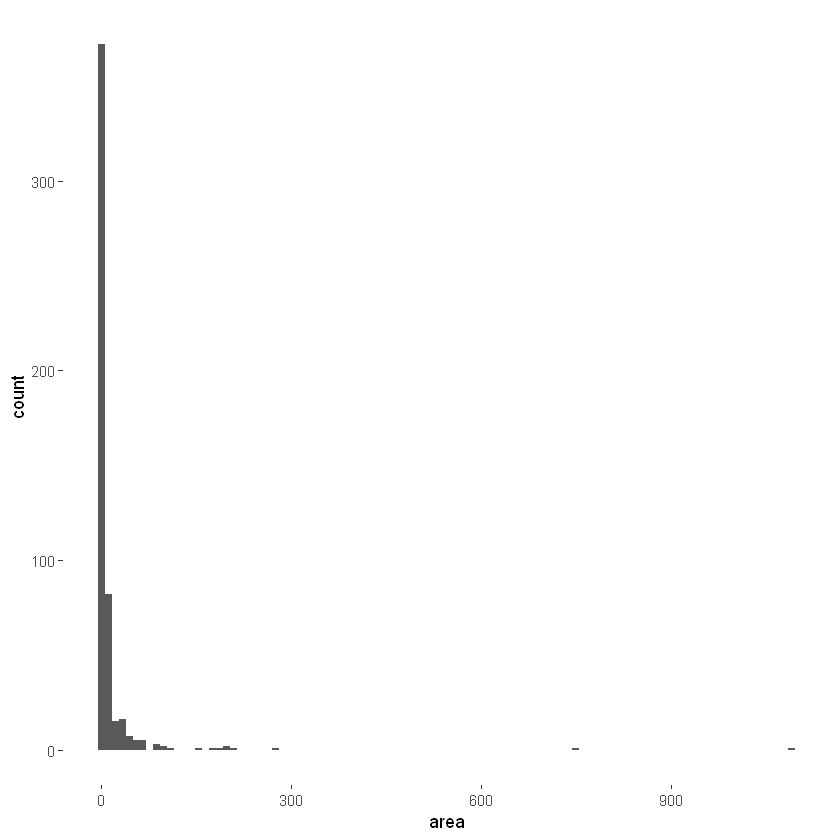

In [21]:
fire_area_hist <- ggplot(data = forestfires) + aes (x = area) + geom_histogram(bins = 100) + theme(panel.background = element_rect(fill = "white"))

fire_area_hist

A histogram display of the frequency counts of area size occurrences reveal why the results are extremely difficult to make sense of. As expected, there are 2 anomalously large values above 700, and an extremely large number of zero values.

Let's sort the forest fires area by descending order, to see the first 10 values:

In [22]:
sort(forestfires$area, decreasing = TRUE)[1:10]

[1] 1090.84  746.28  278.53  212.88  200.94  196.48  185.76  174.63  154.88
[10]  105.66

We see that there are two particularly large area values of 1090.84 and 746.28. These 2 values, along with all 0 values should be filtered out.

In [23]:
forestfires_filtered <- forestfires %>% filter((area != 0) & (area < 300))

We'll now use this forestfires_filtered table to construct our scatter plots.

We'll make another function that uses this new table.

[[1]]


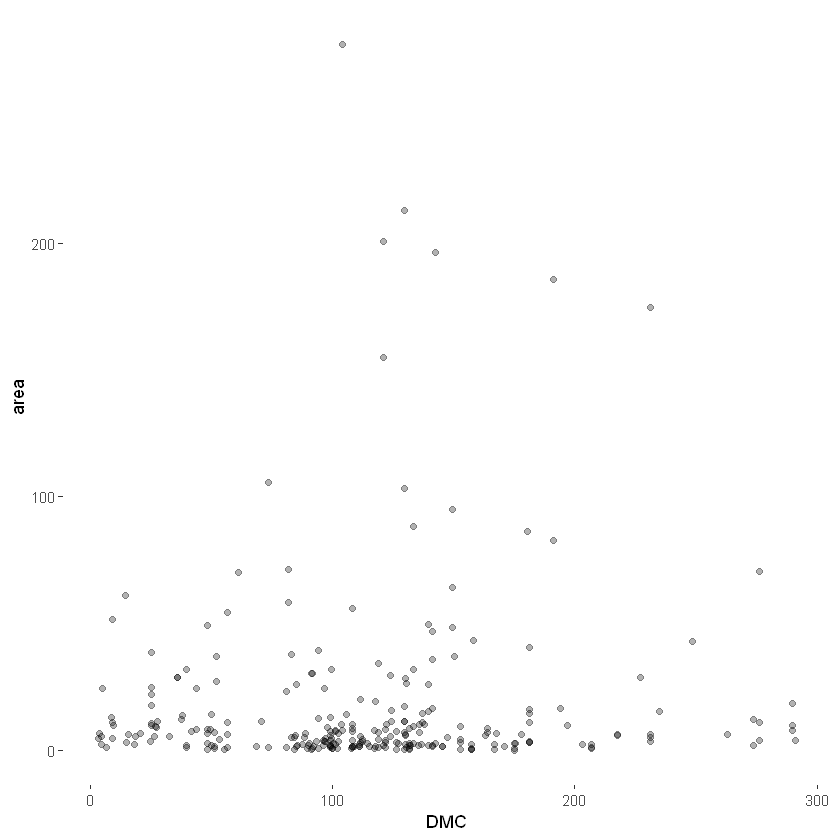

In [25]:
create_scatter2 <- function(x){
  ggplot(data = forestfires_filtered) + aes_string(x = x, y = "area") + geom_point(alpha=0.3) + theme(panel.background = element_rect(fill = "white"))
}

x_scatter_vals2 = names(forestfires)[5:12]

scatterplots2 <- map(x_scatter_vals2, create_scatter2)

# Seeing only the 2nd Scatter Plot
scatterplots2[2]

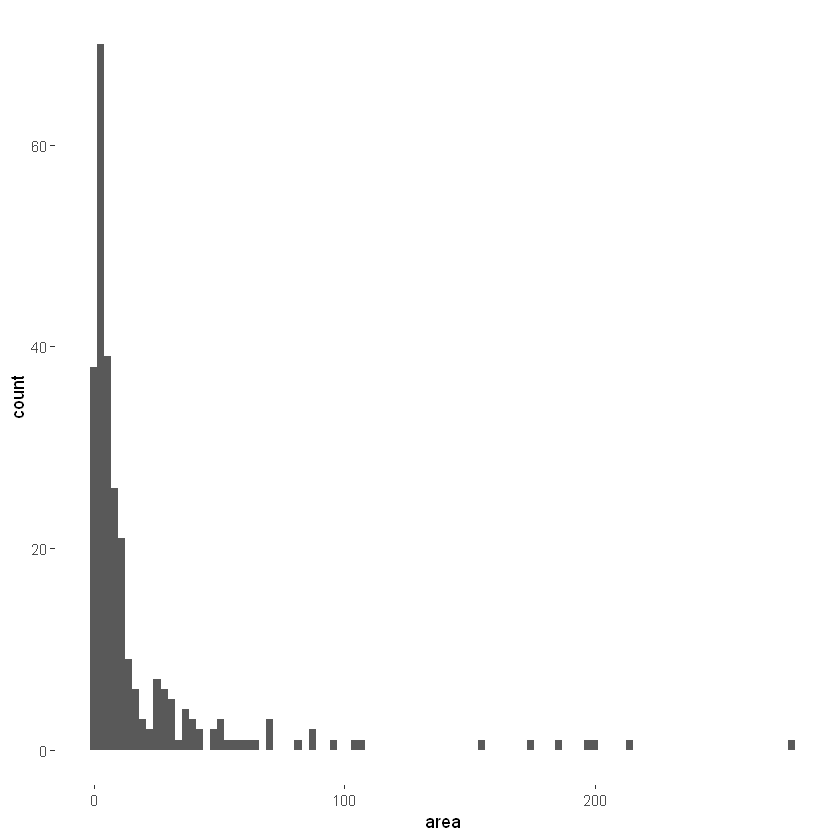

In [26]:
fire_area_hist2 <- ggplot(data = forestfires_filtered) + aes (x = area) + geom_histogram(bins = 100) + theme(panel.background = element_rect(fill = "white"))

fire_area_hist2

We see that even after our filtering, there are still an extremely large number of low values that are affecting the interpretability of the scatter plots. This time, area values below 10 will be filtered out.

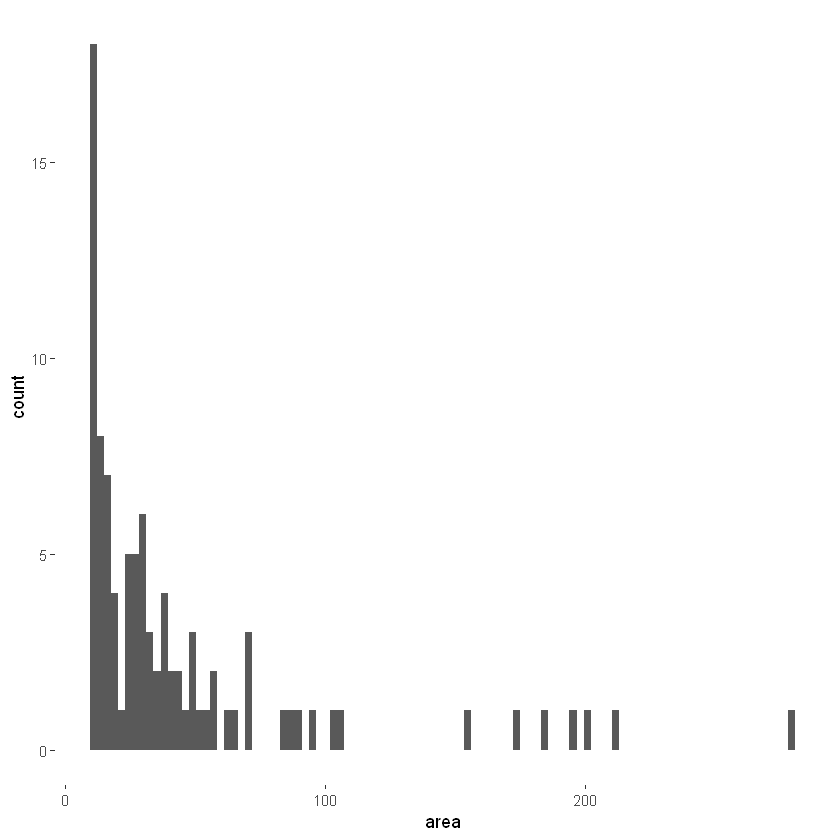

In [27]:
forestfires_filtered2 <- forestfires_filtered %>% filter(area >10)

ggplot(data = forestfires_filtered2) + aes(x = area) + geom_histogram(bins = 100) + theme(panel.background = element_rect(fill = "white"))


The histogram above suggests `forestfires_filtered2` makes a much more suitable dataframe for analysis via Scatter Plots. We'll make another function that uses this dataframe instead.

[[1]]


[[1]]


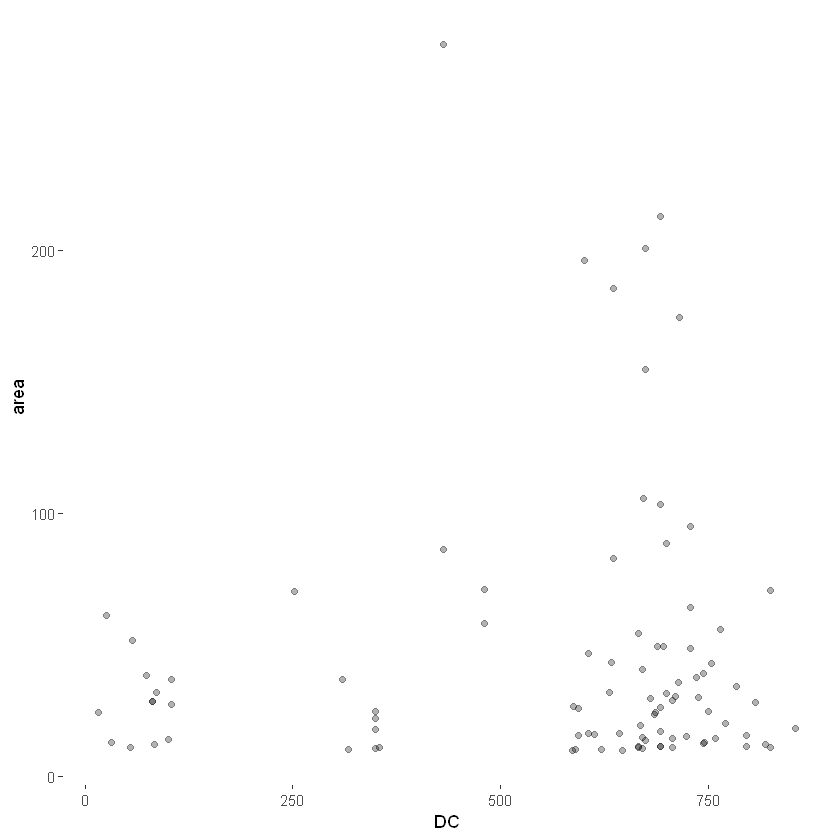

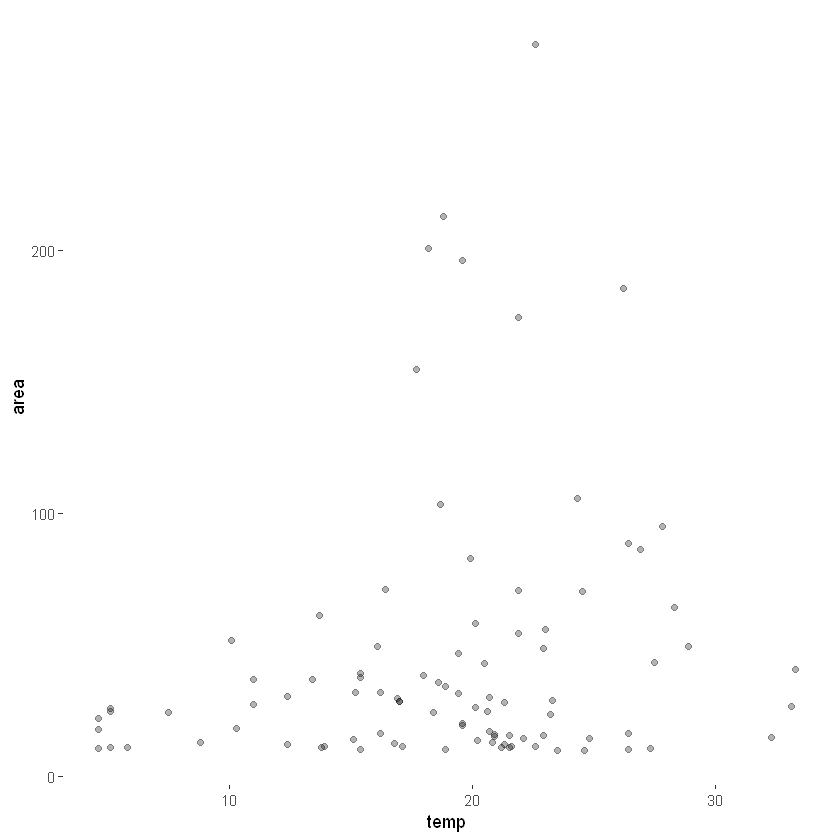

In [42]:
create_scatter3 <- function(x){
  ggplot(data = forestfires_filtered2) + aes_string(x = x, y = "area") + geom_point(alpha=0.3) + theme(panel.background = element_rect(fill = "white"))
}

x_scatter_vals3 = names(forestfires)[5:12]

scatterplots3 <- map(x_scatter_vals3, create_scatter3)

scatterplots3[3]

scatterplots3[5]

The clearest correlations observed are with the `DC`(Drought Code Index) and `temp` variables. 

**While there were high temperature and high DC periods that didn't result in large forest fires, some of the largest forest fires that occurred, particularly the ones with an area above 150 Hectares, happened during conditions of high Temperature and Drought Index**, which is to be expected.